<a href="https://colab.research.google.com/github/AmanMIttu/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection using Machine Learning
### Author: Shaik Aman

## Motivation

While working in cybersecurity, I frequently encountered situations where large volumes of system activity needed to be examined to identify unusual behavior. This raised a practical question: can a machine automatically learn to recognize suspicious patterns?

Financial fraud detection is a real-world example of the same problem. In both cybersecurity and banking systems, abnormal patterns must be identified within massive datasets. This project explores how machine learning models can assist in identifying such anomalies.

The objective of this project is to classify transactions as legitimate or fraudulent using historical transaction data and to understand the challenges involved in real-world anomaly detection.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [2]:
df = pd.read_csv("creditcard.csv")
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Understanding the Dataset

The dataset contains anonymized credit card transactions.  
Each row represents one transaction.

The variable **Class** indicates whether a transaction is fraudulent:
0 → legitimate transaction  
1 → fraudulent transaction

Fraudulent transactions are extremely rare in real systems, making this a difficult classification problem.


In [3]:
df['Class'].value_counts()



,count
Class,
0,284315
1,492


## Observing Class Imbalance

The dataset is highly imbalanced: legitimate transactions vastly outnumber fraudulent ones.

A model could achieve very high accuracy simply by predicting every transaction as legitimate. However, such a model would be useless. Therefore, metrics such as recall and precision are more important than accuracy alone in fraud detection systems.


In [4]:
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])


## Data Preprocessing

Before training the model:
- The target variable is separated
- The transaction amount is normalized
- Features are prepared for machine learning

This simulates how real monitoring systems learn patterns from past transaction data.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)



KeyboardInterrupt: 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LogisticRegression(max_iter=5000, class_weight='balanced', solver='liblinear')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


In [8]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))



Accuracy: 0.9746965813466287
[[83155  2152]
 [   10   126]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.06      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443



## Model Evaluation

The confusion matrix and classification report help evaluate the model.

In fraud detection, recall is very important because missing a fraudulent transaction can lead to financial loss. The results indicate that machine learning models can identify suspicious behavior patterns even when fraud cases are rare.


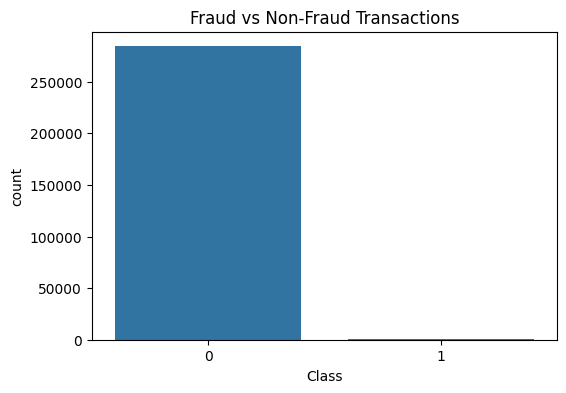

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Fraud vs Non-Fraud Transactions")
plt.savefig("fraud_distribution.png")
plt.show()


## Conclusion

This project demonstrates how machine learning can be applied to anomaly detection problems.

Fraud detection in banking systems and intrusion detection in cybersecurity share similar principles: both involve identifying abnormal patterns in large-scale data.

Through this project, I understood that AI is not only about prediction but also about supporting decision-making in real-world environments. This strengthened my interest in applied artificial intelligence and motivated me to pursue advanced study in intelligent data-driven systems.
